## Demonstration of System Identification using a Convolutional Layer

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

System identification for a linear-time invariant (LTI) system $y[k] = \mathcal{H} \{ x[k] \} = x[k] \ast h[k]$ refers to estimating the impulse response (or transfer function) of the system from known input $x[k]$ and output $y[k]$ signals. In this example, a convolutional layer with one channel serves as a model for an LTI system. The parameters of the model are estimated from example input and output signals. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

### Generate Examples

A set of examples is computed by convolving a normal distributed random signal with the impulse response of the system.

In [2]:
N = 1000
F = 256

X = np.random.normal(size=(N,F))
h = [1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Y = [np.convolve(xi, h, mode='valid') for xi in X]
Y = np.array(Y)

### Definition and Training of the Model

A model with one one-dimensional convolutional layer is defined. The number of channels is chosen as $C=1$, the kernel size is chosen accordingly to the length of the true impulse response of the system and a bias is excluded from the model. The mean-squared error (MSE) is used as loss function.

In [3]:
# set up the model
inputs = Input(shape=(X.shape[1],1))
z = Conv1D(1, 16, use_bias=False)(inputs)
model = Model(inputs, z)
# compile the model
model.compile(loss="mse", optimizer="adam")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 241, 1)            16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Now the model is trained for 100 epochs

In [4]:
history = model.fit(X, Y, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 7.2659
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.7342
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2429
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7901
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3715
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9838
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6251
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2913
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9825
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6955
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4285
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1808
Epoch 13/100
32/32 [=================

### Evaluation of the Model

The trained model is evaluated by inspecting the evolution of the loss over the epochs.

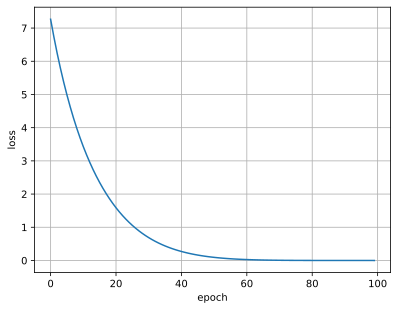

In [5]:
plt.figure()
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()

Now the estimated impulse response $\hat{h}[k]$ is derived from the model by extracting the coefficients from the convolutional layer and reversing their order. The latter is necessary since convolutional layers essential perform a correlation. A comparison of the true impulse response (line plot) with the estimated coefficients reveals that the estimate impulse response is accurately estimated.

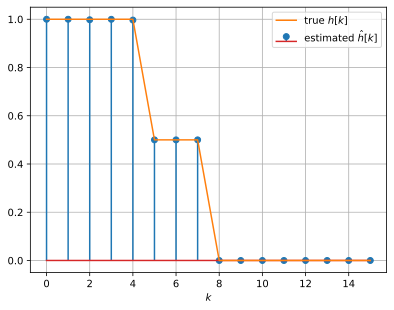

In [6]:
hp = model.layers[1].weights[0].numpy()[::-1]

plt.stem(np.squeeze(hp), label=r'estimated $\hat{h}[k]$')
plt.plot(h, label=r'true $h[k]$', color='C1')
plt.xlabel(r'$k$')
plt.legend()
plt.grid()

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.